Step 8: 2-D Convection
----
***
Now we solve 2D Convection, represented by the pair of coupled partial differential equations below:  

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = 0$$

$$\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = 0$$

Discretizing these equations using the methods we've applied previously yields:
$$\frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{u_{i,j}^n-u_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{u_{i,j}^n-u_{i,j-1}^n}{\Delta y} = 0$$

$$\frac{v_{i,j}^{n+1}-v_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{v_{i,j}^n-v_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{v_{i,j}^n-v_{i,j-1}^n}{\Delta y} = 0$$
Rearranging both equations, we solve for $u_{i,j}^{n+1}$ and $v_{i,j}^{n+1}$, respectively.  Note that these equations are also coupled.  

$$u_{i,j}^{n+1} = u_{i,j}^n - u_{i,j} \frac{\Delta t}{\Delta x} (u_{i,j}^n-u_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (u_{i,j}^n-u_{i,j-1}^n)$$

$$v_{i,j}^{n+1} = v_{i,j}^n - u_{i,j} \frac{\Delta t}{\Delta x} (v_{i,j}^n-v_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (v_{i,j}^n-v_{i,j-1}^n)$$
### Initial Conditions

The initial conditions are the same that we used for 1D convection, applied in both the x and y directions.  

$$u,\ v\ = \begin{cases}\begin{matrix}
2 & \text{for } x,y \in (0.5, 1)\times(0.5,1) \cr
1 & \text{everywhere else}
\end{matrix}\end{cases}$$

### Boundary Conditions

The boundary conditions hold u and v equal to 1 along the boundaries of the grid
.

$$u = 1,\ v = 1 \text{ for } \begin{cases} \begin{matrix}x=0,2\cr y=0,2 \end{matrix}\end{cases}$$

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt, cm
import numpy as np

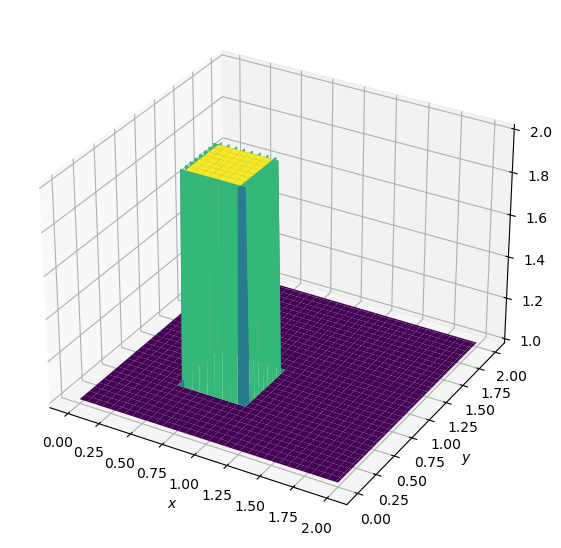

In [2]:
# declare variables

nx = 101
ny = 101
nt = 80
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = 0.2
dt = sigma * dx

x = np.linspace(0,2,nx)
y = np.linspace(0,2,ny)

u = np.ones((nx,ny))
v = np.ones((nx,ny))
un = np.ones((nx,ny))
vn = np.ones((nx,ny))

# assign initial conditions
##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
u[int(.5 / dx):int(1 / dx + 1), int(.5 / dy):int(1 / dy + 1)] = 2
##set hat function I.C. : v(.5<=x<=1 && .5<=y<=1 ) is 2
v[int(.5 / dx):int(1 / dx + 1), int(.5 / dy):int(1 / dy + 1)] = 2

fig = plt.figure(figsize = (11,7), dpi=100)
ax = fig.add_subplot(111, projection='3d')
# The '111' means a grid of 1 row and 1 column and this subplot is the first one.
X, Y = np.meshgrid(x,y)
surf = ax.plot_surface(X,Y,u,cmap=cm.viridis)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

$$u_{i,j}^{n+1} = u_{i,j}^n - u_{i,j} \frac{\Delta t}{\Delta x} (u_{i,j}^n-u_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (u_{i,j}^n-u_{i,j-1}^n)$$
​
$$v_{i,j}^{n+1} = v_{i,j}^n - u_{i,j} \frac{\Delta t}{\Delta x} (v_{i,j}^n-v_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (v_{i,j}^n-v_{i,j-1}^n)$$

In [3]:
for n in range(nt):  # we will use array operations to replace nested for-loops
    un = u.copy()
    vn = v.copy()
    u[1:,1:] = (un[1:,1:] -
                (un[1:,1:] * c * dt / dx * (un[1:,1:] - un[:-1,1:])) -
                 vn[1:,1:] * c * dt / dy * (un[1:,1:] - un[1:,:-1]))
    v[1:,1:] = (vn[1:,1:] -
                (un[1:,1:] * c * dt / dx * (vn[1:,1:] - vn[:-1,1:])) -
                 vn[1:,1:] * c * dt / dy * (vn[1:,1:] - vn[1:,:-1]))
    u[0,:] = 1
    u[:,0] = 1
    v[0,:] = 1
    v[:,0] = 1
    

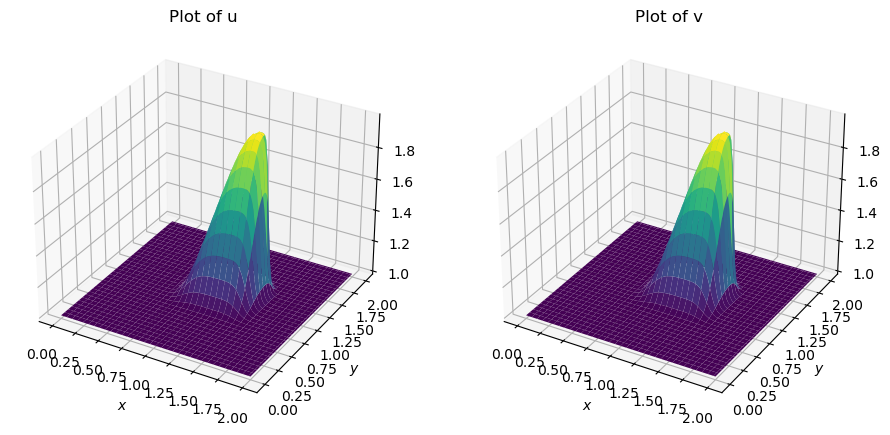

In [4]:
fig = plt.figure(figsize = (11,7), dpi=100)  # Adjust the size to accommodate two plots

ax1 = fig.add_subplot(121, projection='3d')  # The '121' means a grid of 1 row and 2 columns, and this is the first plot
X, Y = np.meshgrid(x,y)
surf1 = ax1.plot_surface(X,Y,u,cmap=cm.viridis)
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_title('Plot of u')

ax2 = fig.add_subplot(122, projection='3d')  # The '122' means a grid of 1 row and 2 columns, and this is the second plot
surf2 = ax2.plot_surface(X,Y,v,cmap=cm.viridis)
ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')
ax2.set_title('Plot of v')

plt.show()